# 泰坦尼克号幸存者预测

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  ## 数据预处理

In [13]:
#筛选特征
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
#处理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [16]:
data.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [17]:
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

In [18]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [20]:
data['Sex'] = (data['Sex'] == 'male').astype('int')

In [21]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


In [23]:
x = data.iloc[:,data.columns != 'Survived']

In [24]:
y = data.iloc[:,data.columns == 'Survived']

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

In [27]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [28]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,488,1,1,58.000000,0,0,29.7000,1
1,879,3,1,29.699118,0,0,7.8958,0
2,479,3,1,22.000000,0,0,7.5208,0
3,382,3,0,1.000000,0,2,15.7417,1
4,580,3,1,32.000000,0,0,7.9250,0
...,...,...,...,...,...,...,...,...
618,475,3,0,22.000000,0,0,9.8375,0
619,53,1,0,49.000000,1,0,76.7292,1
620,720,3,1,33.000000,0,0,7.7750,0
621,89,1,0,23.000000,3,2,263.0000,0


##  构建模型及训练

In [29]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.7201492537313433

In [31]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()

score

0.7464294631710362

0.8170536828963796


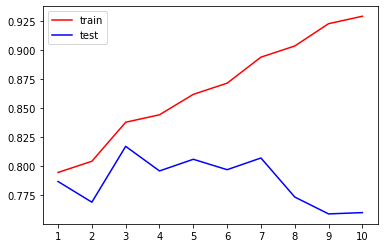

In [37]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                criterion='entropy',
                                max_depth=i+1
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='r',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [39]:
import numpy as np
gini_threholds = np.linspace(0,0.5,50)

#parameters:一串参数和这些参数对应的，我们希望网格搜索的参数的取值范围
parameters = {'criterion':('gini','entropy'),
              'splitter':('best','random'),
              'min_samples_leaf':[*range(1,50,5)],
              'min_impurity_decrease':gini_threholds}

#网格搜索:帮助我们同时调整多个参数。（基于枚举技术）
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='dep...
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 

In [40]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'entropy',
 'min_impurity_decrease': 0.01020408163265306,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [41]:
GS.best_score_ #网格搜索后的模型的评判标准 

0.8314132104454686